<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Manuel/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Clone git for data
!git clone https://github.com/ManuelBagasina/DATCapstone.git

Cloning into 'DATCapstone'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 241 (delta 55), reused 6 (delta 1), pack-reused 126 (from 1)
Receiving objects: 100% (241/241), 21.48 MiB | 7.10 MiB/s, done.
Resolving deltas: 100% (130/130), done.


In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

# Preprocessing

In [ ]:
import pandas as pd

# File paths
files = {
    "stock": "/content/DATCapstone/data/AAPL_stock.csv",
    "micro": "/content/DATCapstone/data/AAPL_micro.csv",
    "macro": "/content/DATCapstone/data/AAPL_macro.csv",
    "articles": "/content/DATCapstone/data/AAPL_articles.csv",
    "reddit": "/content/DATCapstone/data/AAPL_reddit.csv"
}

# Load the data into dataframes
dfs = {name: pd.read_csv(path) for name, path in files.items()}

# Convert date columns to datetime format
dfs["stock"]["Date"] = pd.to_datetime(dfs["stock"]["Unnamed: 0"])
dfs["micro"]["Date"] = pd.to_datetime(dfs["micro"]["Unnamed: 0"])
dfs["macro"]["Date"] = pd.to_datetime(dfs["macro"]["Unnamed: 0"])
dfs["articles"]["Date"] = pd.to_datetime(dfs["articles"]["time"], errors='coerce', utc=True).dt.tz_convert(None).dt.date
dfs["reddit"]["Date"] = pd.to_datetime(dfs["reddit"]["Unnamed: 0"])

# Drop unnecessary columns
dfs = {key: df.drop(columns=["Unnamed: 0", "time"], errors="ignore") for key, df in dfs.items()}

### Macroeconomic Data

In [ ]:
dfs['macro'].sort_values('Date', inplace = True)
dfs["macro"].ffill(inplace=True)
dfs["macro"].dropna(inplace=True)
# Resample macroeconomic data to daily frequency using forward fill
dfs["macro"] = dfs["macro"].set_index("Date").resample("D").ffill().reset_index()
dfs["macro"]

,Date,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
0,1992-01-01,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
1,1992-01-02,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
2,1992-01-03,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
3,1992-01-04,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
4,1992-01-05,6363.102,7.3,115.600,164095.0,61.4823,1176.0,4084.7,-2026.0,3367.7,67.5
...,...,...,...,...,...,...,...,...,...,...,...
12050,2024-12-28,29700.580,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,19363.4,74.0
12051,2024-12-29,29700.580,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,19363.4,74.0
12052,2024-12-30,29700.580,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,19363.4,74.0
12053,2024-12-31,29700.580,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,19363.4,74.0


### Microeconomic Data

In [ ]:
dfs['micro'].sort_values('Date', inplace = True)
dfs["micro"].ffill(inplace=True)
dfs['micro'].reset_index(drop = True, inplace = True)
dfs['micro'].drop(0, axis = 0, inplace = True)
# Resample macroeconomic data to daily frequency using forward fill
dfs["micro"] = dfs["micro"].set_index("Date").resample("D").ffill().reset_index()

# Expand Dataframe ~ 2024-12-31
last_date = dfs["micro"]["Date"].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), end="2024-12-31", freq="D")
future_df = pd.DataFrame({"Date": future_dates})

# Original dataframe + Expanded dataframe
dfs["micro"] = pd.concat([dfs["micro"], future_df], ignore_index=True)

# Forward Fill
dfs["micro"].ffill(inplace=True)

dfs["micro"]

,Date,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
0,2021-09-30,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
1,2021-10-01,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
2,2021-10-02,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
3,2021-10-03,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
4,2021-10-04,0.0,0.133,1.231360e+11,9.468000e+10,1.128400e+10,2.129810e+11,1.231360e+11,1.118520e+11,198000000.0,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,2024-12-27,0.0,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,-183000000.0,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
1185,2024-12-28,0.0,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,-183000000.0,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
1186,2024-12-29,0.0,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,-183000000.0,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
1187,2024-12-30,0.0,0.241,1.346610e+11,9.373600e+10,1.144500e+10,2.103520e+11,1.346610e+11,1.232160e+11,-183000000.0,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10


### Merge: Stock + Macro + Micro

In [ ]:
#Merging
merged_df = dfs['stock'].merge(dfs['macro'], on='Date', how='inner')
merged_df = merged_df.merge(dfs['micro'], on = 'Date', how = 'inner')
merged_df.set_index('Date', inplace = True)
merged_df.reset_index(inplace = True)

# Date Filtering
start_date = "2021-09-30"
end_date = "2024-12-31"

SMM_df = merged_df[(merged_df["Date"] >= start_date) & (merged_df["Date"] <= end_date)]

SMM_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
0,2021-09-30,140.983639,141.690227,138.647974,138.863876,89056700,0.0,0.0,23921.991,4.7,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
1,2021-10-01,139.256465,140.257467,136.518448,139.992493,94639600,0.0,0.0,24777.038,4.5,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
2,2021-10-04,139.119068,139.560697,135.694095,136.547882,98322000,0.0,0.0,24777.038,4.5,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,-2.642000e+09,-1.402800e+10,-1.012500e+10,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,2024-12-24,255.209412,257.926411,255.009620,257.916443,23234700,0.0,0.0,29700.580,4.1,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
814,2024-12-26,257.906429,259.814335,257.347047,258.735504,27237100,0.0,0.0,29700.580,4.1,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
815,2024-12-27,257.546826,258.415896,252.782075,255.309296,42355300,0.0,0.0,29700.580,4.1,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10
816,2024-12-30,251.952985,253.221595,250.474615,251.923019,35557500,0.0,0.0,29700.580,4.1,...,-1.046000e+09,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,8.950000e+08,8.950000e+08,1.144500e+10,1.144500e+10,9.373600e+10


### Articles

In [ ]:
#Articles sentiment ont hot encoding
dfs['articles'] = dfs['articles'][['Date', 'sentiment']]
dfs['articles'] = pd.get_dummies(dfs['articles'], columns = ['sentiment'])
dfs['articles'] = dfs['articles'].groupby('Date').sum()
dfs['articles'].rename(columns=lambda x: f"articles_{x}", inplace=True)
dfs['articles'].reset_index(inplace = True)
dfs['articles']['Date'] = pd.to_datetime(dfs['articles']['Date'])
dfs['articles'].head()

,Date,articles_sentiment_Negative,articles_sentiment_Neutral,articles_sentiment_Positive
0,2020-03-18,3,9,12
1,2020-03-19,2,6,5
2,2020-03-20,4,12,5
3,2020-03-21,0,1,2
4,2020-03-22,1,3,3


##### Merge: Articles

In [ ]:
#Merging
merged_df = merged_df.merge(dfs['articles'], on = 'Date', how = 'left')
merged_df.set_index('Date', inplace = True)
merged_df.reset_index(inplace = True)
merged_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations,articles_sentiment_Negative,articles_sentiment_Neutral,articles_sentiment_Positive
0,2021-09-30,140.983639,141.690227,138.647974,138.863876,89056700,0.0,0.0,23921.991,4.7,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,1,2,1
1,2021-10-01,139.256465,140.257467,136.518448,139.992493,94639600,0.0,0.0,24777.038,4.5,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,2,4,4
2,2021-10-04,139.119068,139.560697,135.694095,136.547882,98322000,0.0,0.0,24777.038,4.5,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,4,0,8
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,2,1,3
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,-4.921000e+09,7.906000e+09,-4.774000e+09,-4.774000e+09,1.128400e+10,1.128400e+10,9.468000e+10,5,1,2


### Reddit

In [ ]:
from transformers import pipeline

# Load FinBERT sentiment analysis model
sentiment_pipeline = pipeline("text-classification", model="ProsusAI/finbert")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import torch

# Load FinBERT model and tokenizer
model_name = "ProsusAI/finbert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load dataset
df = dfs["reddit"].copy()

# Define function for sentiment analysis with truncation
def batch_sentiment_analysis(texts):
    # Ensure texts are strings & replace NaN with "Neutral"
    texts = [str(t) if pd.notna(t) else "Neutral" for t in texts]

    # Tokenization with truncation
    inputs = tokenizer(texts, padding=True, truncation=True, max_length=512, return_tensors="pt")
    inputs = {key: val.to(device) for key, val in inputs.items()}  # Move to GPU if available

    # Run inference
    model.to(device)
    with torch.no_grad():
        outputs = model(**inputs)

    # Convert logits to predicted class
    predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
    labels = ["negative", "neutral", "positive"]
    results = [labels[pred.argmax().item()] for pred in predictions]

    return results

# Apply batch processing for sentiment analysis
batch_size = 32  # Adjust based on GPU memory
for col in ["Title", "Comment1", "Comment2", "Comment3"]:
    text_list = df[col].fillna("Neutral").tolist()  # Replace NaN with "Neutral"
    sentiment_results = []

    # Process in batches
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i+batch_size]
        sentiment_results.extend(batch_sentiment_analysis(batch))

    # Assign results back to the DataFrame
    df[f"{col}_Sentiment"] = sentiment_results

df.head()

,Title,Score,Comment1,Comment1_Score,Comment2,Comment2_Score,Comment3,Comment3_Score,Date,Title_Sentiment,Comment1_Sentiment,Comment2_Sentiment,Comment3_Sentiment
0,"Apple, facing tariffs on Chinese imports, says...",1431,coincidentally the construction isn’t supposed...,2413.0,Isn't that basically what they claimed last ti...,295.0,The best part of the article is that part of t...,41.0,2025-02-24,positive,neutral,positive,positive
1,Apple pulls data protection tool after UK gove...,14,Idk how to feel about the EU. Sometimes they f...,2.0,NaN,NaN,NaN,NaN,2025-02-22,neutral,positive,positive,positive
2,Apple Warns UK iPhone Owners It Will Remove En...,174,This seems like a massive shoot in the foot fo...,88.0,Encryption was one of the selling point of Apple.,39.0,UK government really hates personal rights an...,41.0,2025-02-21,neutral,neutral,positive,neutral
3,Apple removing end-to-end cloud encryption fea...,1182,"Great work UK government, now your citizens ar...",577.0,> Britain had ordered Apple to give it unprece...,411.0,Make sure to email your MP about this. You can...,48.0,2025-02-21,positive,positive,positive,positive
4,Apple Warns UK iPhone Owners It Will Remove En...,175,This seems like a massive shoot in the foot fo...,89.0,Encryption was one of the selling point of Apple.,41.0,UK government really hates personal rights an...,41.0,2025-02-21,neutral,neutral,positive,neutral


In [ ]:
# Apply One-Hot Encoding
for col in ["Title_Sentiment", "Comment1_Sentiment", "Comment2_Sentiment", "Comment3_Sentiment"]:
    df = pd.get_dummies(df, columns=[col], prefix=col)

# Formatting
df.drop(columns=["Title", "Comment1", "Comment2", "Comment3"], inplace=True)
df.sort_values('Date', inplace = True)
df.set_index('Date', inplace = True)
df.reset_index(inplace = True)

#Sum by date
df = df.groupby("Date").sum()

# Formatting
df = df.rename(columns=lambda x: f"reddit_{x}")

dfs['reddit'] = df.copy()
dfs['reddit'].head()

,reddit_Score,reddit_Comment1_Score,reddit_Comment2_Score,reddit_Comment3_Score,reddit_Title_Sentiment_negative,reddit_Title_Sentiment_neutral,reddit_Title_Sentiment_positive,reddit_Comment1_Sentiment_negative,reddit_Comment1_Sentiment_neutral,reddit_Comment1_Sentiment_positive,reddit_Comment2_Sentiment_negative,reddit_Comment2_Sentiment_neutral,reddit_Comment2_Sentiment_positive,reddit_Comment3_Sentiment_negative,reddit_Comment3_Sentiment_neutral,reddit_Comment3_Sentiment_positive
Date,,,,,,,,,,,,,,,,
2008-07-10,0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,1
2008-12-22,0,2.0,1.0,1.0,0,1,0,0,0,1,0,0,1,0,1,0
2009-01-19,2,0.0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,1
2009-09-03,0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,1,0,0,1
2009-11-08,0,1.0,0.0,0.0,0,0,1,0,0,1,0,0,1,0,0,1


##### Merge: Reddit

In [ ]:
#Merging
merged_df = merged_df.merge(dfs['reddit'], on = 'Date', how = 'left')
merged_df.set_index('Date', inplace = True)
merged_df.reset_index(inplace = True)
df = merged_df.copy()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,reddit_Title_Sentiment_positive,reddit_Comment1_Sentiment_negative,reddit_Comment1_Sentiment_neutral,reddit_Comment1_Sentiment_positive,reddit_Comment2_Sentiment_negative,reddit_Comment2_Sentiment_neutral,reddit_Comment2_Sentiment_positive,reddit_Comment3_Sentiment_negative,reddit_Comment3_Sentiment_neutral,reddit_Comment3_Sentiment_positive
0,2021-09-30,140.983639,141.690227,138.647974,138.863876,89056700,0.0,0.0,23921.991,4.7,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0
1,2021-10-01,139.256465,140.257467,136.518448,139.992493,94639600,0.0,0.0,24777.038,4.5,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2021-10-04,139.119068,139.560697,135.694095,136.547882,98322000,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check Columns
for x in df.columns:
  print(x)

Date
Open
High
Low
Close
Volume
Dividends
Stock Splits
GDP (Billions USD)
Unemployment Rate (%)
Producer Price Index (PPI)
Retail Sales (Millions USD)
Industrial Production Index
Housing Starts (Thousands)
Personal Consumption Expenditures (PCE)
Trade Balance (Billions USD)
M2 Money Supply (Billions USD)
Consumer Confidence Index
Tax Effect Of Unusual Items
Tax Rate For Calcs
Normalized EBITDA
Net Income From Continuing Operation Net Minority Interest
Reconciled Depreciation
Reconciled Cost Of Revenue
EBITDA
EBIT
Net Interest Income
Interest Expense
Interest Income
Normalized Income
Net Income From Continuing And Discontinued Operation
Total Expenses
Total Operating Income As Reported
Diluted Average Shares
Basic Average Shares
Diluted EPS
Basic EPS
Diluted NI Availto Com Stockholders
Net Income Common Stockholders
Net Income
Net Income Including Noncontrolling Interests
Net Income Continuous Operations
Tax Provision
Pretax Income
Other Income Expense
Other Non Operating Income Expense

#EDA

Date range: 2021-09-30 00:00:00 to 2024-12-31 00:00:00
Missing values:\nreddit_Comment3_Sentiment_positive    621
reddit_Score                          621
reddit_Comment1_Score                 621
reddit_Comment2_Score                 621
reddit_Comment3_Sentiment_neutral     621
reddit_Comment3_Sentiment_negative    621
reddit_Comment2_Sentiment_positive    621
reddit_Comment2_Sentiment_neutral     621
reddit_Comment2_Sentiment_negative    621
reddit_Comment1_Sentiment_positive    621
dtype: int64
Feature distributions:\nFinancing Cash Flow                              -1.055915e+11
Cash Flow From Continuing Financing Activities   -1.055915e+11
Repurchase Of Capital Stock                      -8.516354e+10
Net Common Stock Issuance                        -8.516354e+10
Common Stock Payments                            -8.516354e+10
                                                      ...     
Total Expenses                                    2.669714e+11
Total Liabilities Net Minority

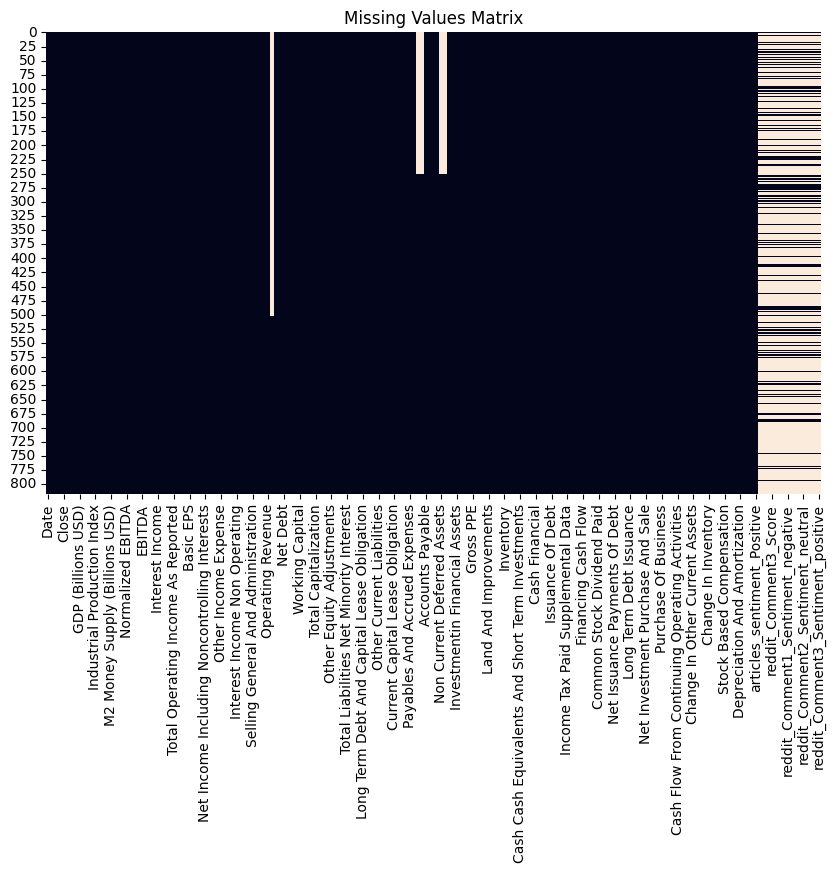

In [ ]:
# Checking missing data
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Missing values:\\n{df.isnull().sum().sort_values(ascending=False).head(10)}")

# Select only numerical columns for calculating and sorting means
numerical_df = df.select_dtypes(include=['number'])
print(f"Feature distributions:\\n{numerical_df.describe().loc['mean'].sort_values()}")

# graph
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Matrix')
plt.show()

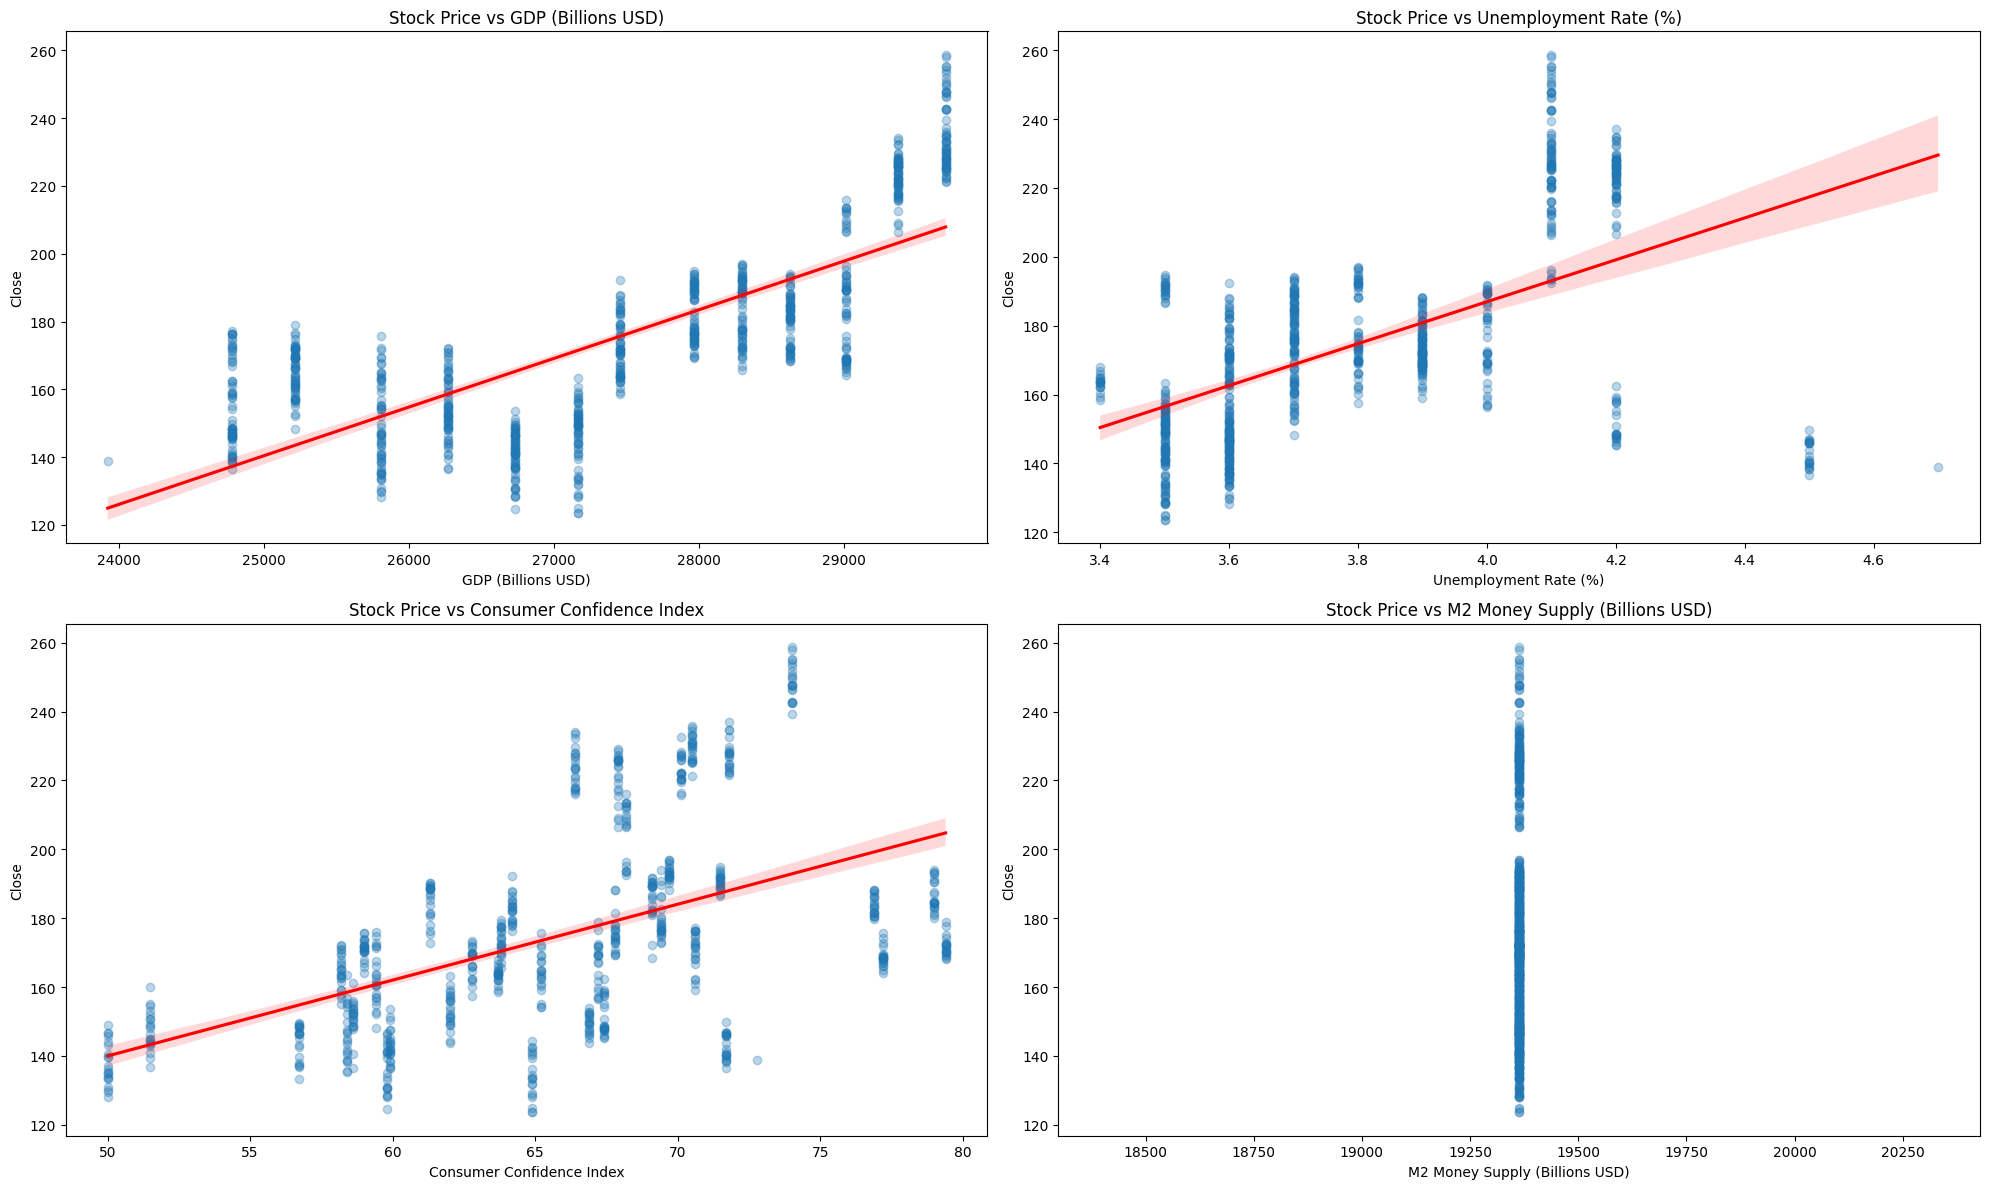

In [ ]:
# 1. Macro-Stock Relationship Analysis (
macro_features = ['GDP (Billions USD)', 'Unemployment Rate (%)',
                 'Consumer Confidence Index', 'M2 Money Supply (Billions USD)']

fig, axes = plt.subplots(2, 2, figsize=(20,12))
for ax, feature in zip(axes.flatten(), macro_features):
    sns.regplot(x=feature, y='Close', data=df, ax=ax,
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    ax.set_title(f'Stock Price vs {feature}')
plt.tight_layout()
plt.show()


In [ ]:
# 2. Microeconomic Impact Analysis
micro_features = ['PE Ratio', 'EBITDA', 'Net Income',
                 'Return on Assets (ROA)', 'EPS']



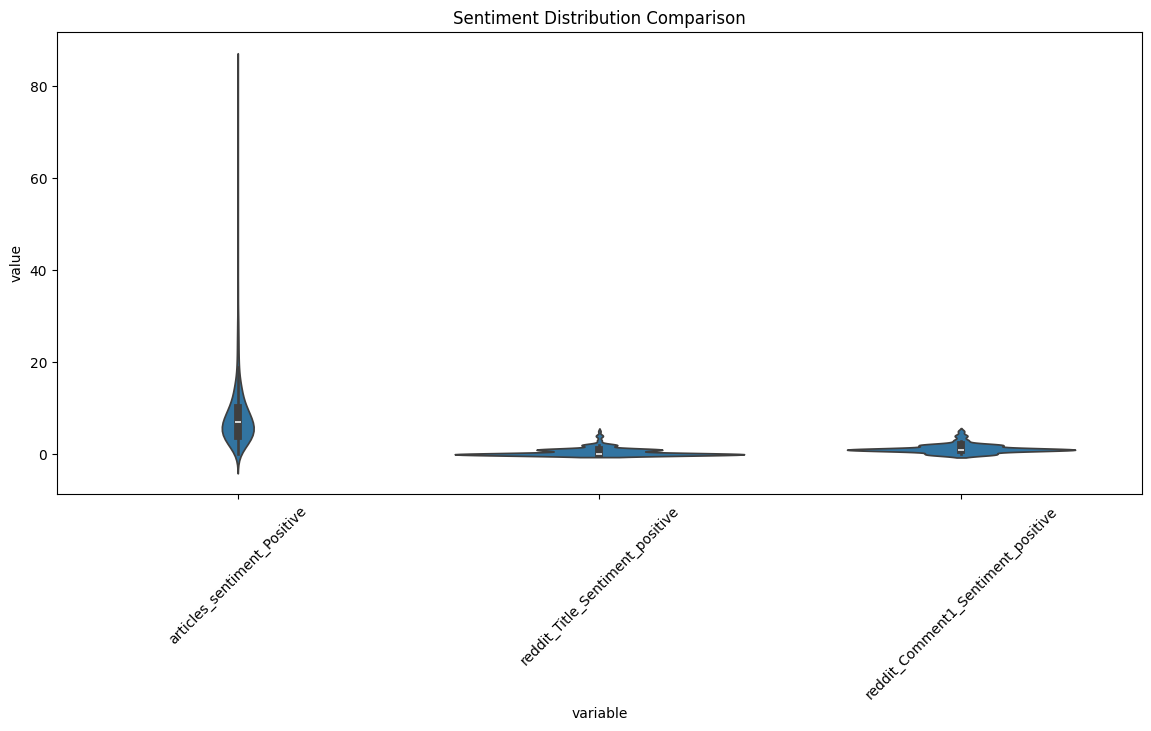

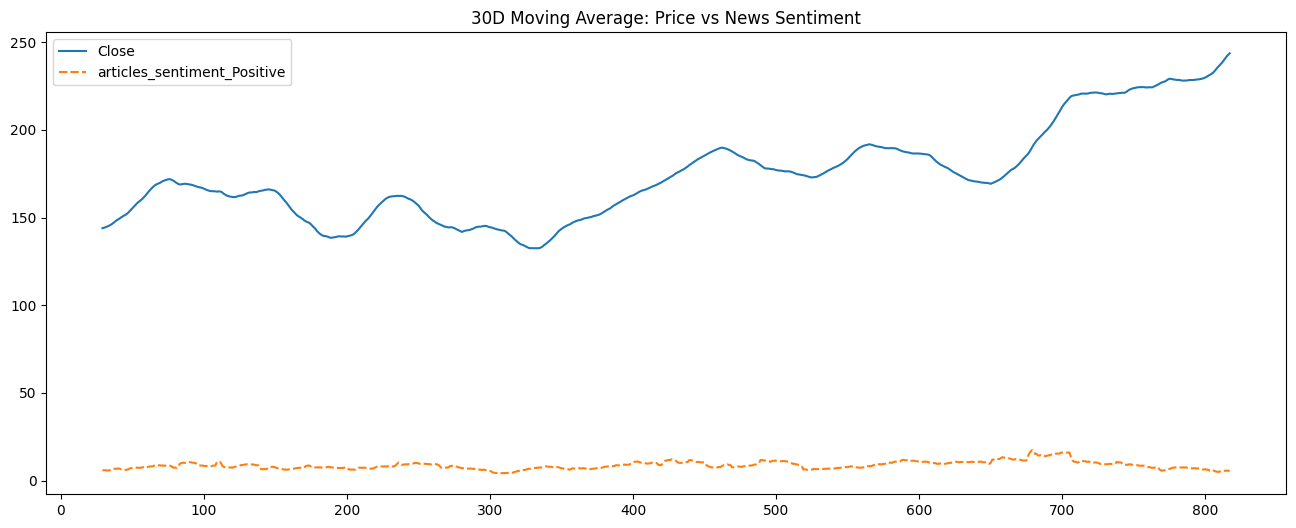

In [ ]:
# 3. Sentiment Cross-Platform Analysis (Lit Review 2.1.4)
sentiment_cols = ['articles_sentiment_Positive',
                 'reddit_Title_Sentiment_positive',
                 'reddit_Comment1_Sentiment_positive']

plt.figure(figsize=(14,6))
sns.violinplot(data=df[sentiment_cols].melt(), x='variable', y='value')
plt.title('Sentiment Distribution Comparison')
plt.xticks(rotation=45)
plt.show()

# Sentiment-Price Lag Analysis
fig, ax = plt.subplots(figsize=(16,6))
sns.lineplot(data=df[['Close','articles_sentiment_Positive']].rolling(30).mean(),
             ax=ax, legend='auto')
plt.title('30D Moving Average: Price vs News Sentiment')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


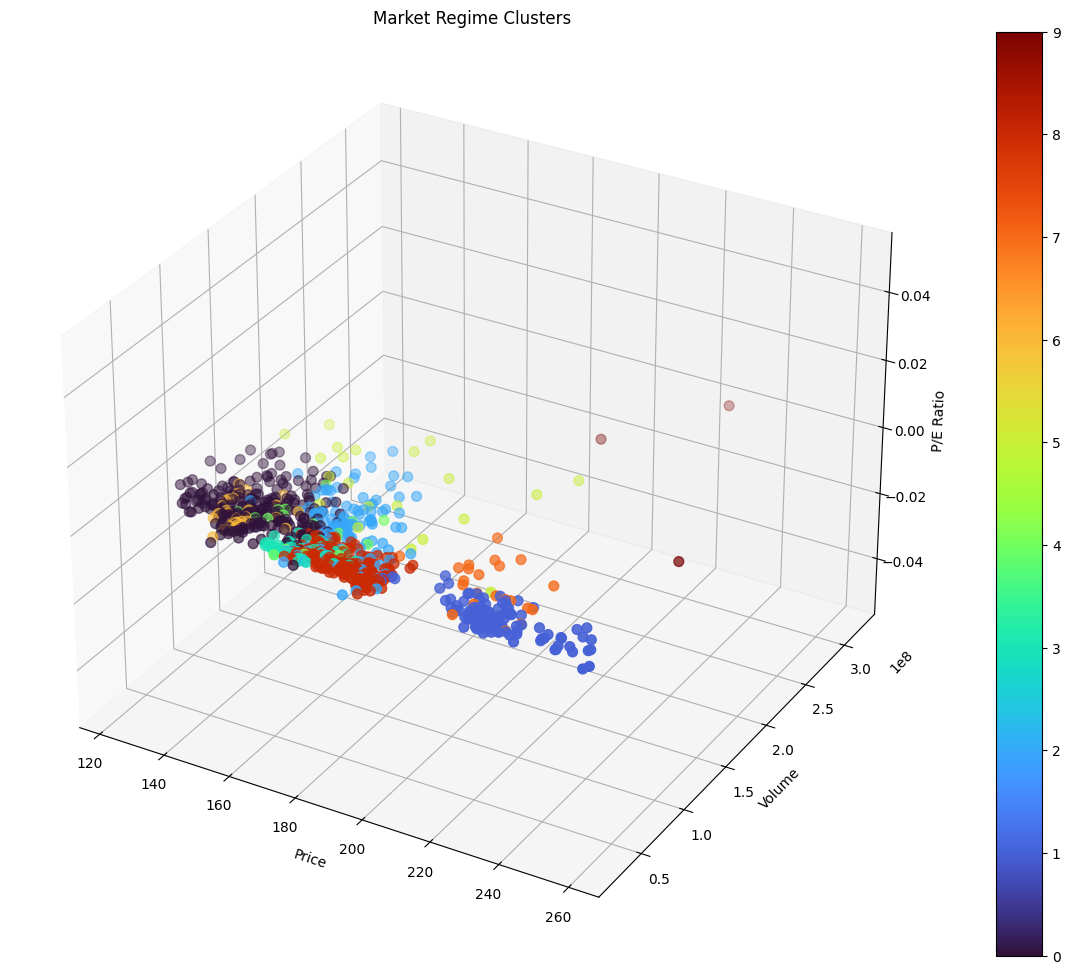

In [ ]:
# 4. Market Regime Clustering (Project Plan 6.Methodology)
from sklearn.preprocessing import RobustScaler
from sklearn.mixture import BayesianGaussianMixture

cluster_features = ['Close', 'Volume',
                   'articles_sentiment_Positive',
                   'Unemployment Rate (%)']

cluster_data = df[cluster_features].dropna()
scaler = RobustScaler()
scaled_data = scaler.fit_transform(cluster_data)

# Bayesian GMM for automatic component selection
bgmm = BayesianGaussianMixture(n_components=10,
                              weight_concentration_prior=0.01)
df['Cluster'] = bgmm.fit_predict(scaled_data)

# 3D Visualization
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(cluster_data['Close'], cluster_data['Volume'],
                 c=df['Cluster'],
                cmap='turbo', s=50)
plt.title('Market Regime Clusters')
ax.set_xlabel('Price')
ax.set_ylabel('Volume')
ax.set_zlabel('P/E Ratio')
plt.colorbar(sc)
plt.show()


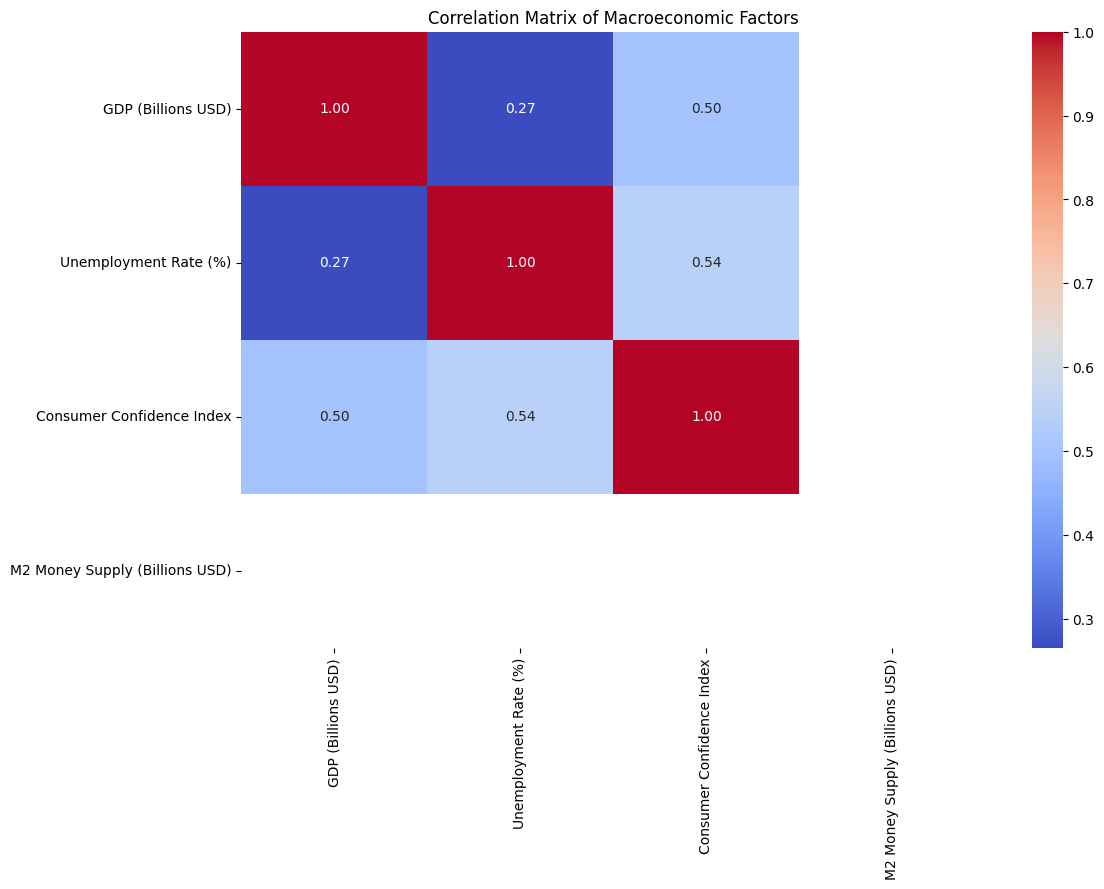

In [ ]:
# prompt: make heatmap of macro economic factors

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with macroeconomic data
# Replace with your actual DataFrame and column names if different

macro_features = ['GDP (Billions USD)', 'Unemployment Rate (%)',
                 'Consumer Confidence Index', 'M2 Money Supply (Billions USD)']

plt.figure(figsize=(12, 8))
sns.heatmap(df[macro_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Macroeconomic Factors')
plt.show()


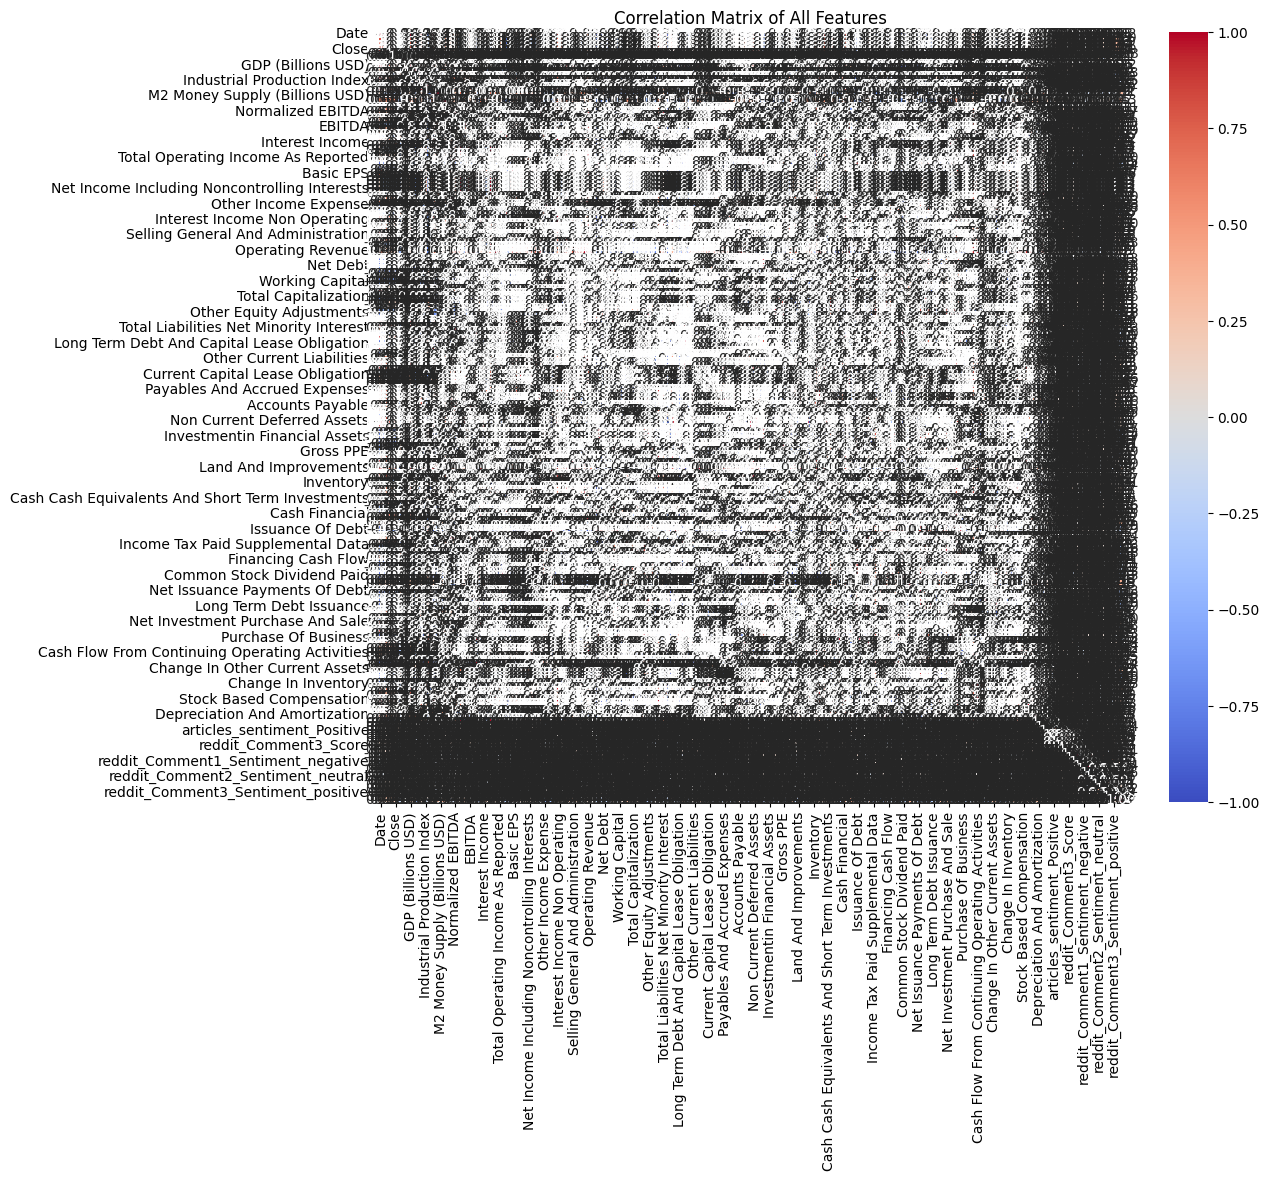

In [ ]:
# prompt: make heatmap of sentinemtn datafeaures

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and you want a heatmap of all numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Features')
plt.show()


# Feature Engineering

# Feature Selection

# Model Development

# Model Evaluation